<img src="AW&H2015.png" style="float: left">

<img src="flopylogo.png" style="float: center">

# With great power comes great responsibility: Addressing the ill-posed highly parameterized problem with our second line of defense Tikhonov regularization

We are now moving up the simplicity-complexity curve because now we have many more parameters, even more than our observations.  Have we passed the sweetspot?  

<img src="Hunt1998_sweetspot.png" style="float: center">


Again, it is not simply the number of parameters that is at issue.  The better way to think of it is that we just want to avoid "living beyond our means". That is, we do not bring more parameters to bear than we have the ability to constrain.  We constrain them observations as we have seen so far, but we also know things about the system that are not hard data like measurements.  This "soft-knowledge" can also be applied to  constrain our parameters through a mechanism called __"Tikhonov regularization"__.  In this formulation of the inverse problem, we add a second term to our "best fit" metric Phi. This second term reflects the deviation from our soft-knowledge of the system, and is a penalty to our fit. Here's how it looks using the Anderson et al. (2015) forumlation:

<img src="tik-reg_eq9.8.png" style="float: center">


As first term after the equal sign is our __measurement objective function__, which we've been working with all week.  The last term on the right is called the __"regularization objective function"__. These 2 terms combine to create a __total Phi__ on the left.  __Now Total Phi is what we minimize__, which means we are minimizing our observed-to-simulated residuals __AND__ the deviation from soft-knowledge.  So in this way Tikhonov regularization is a "dual-constrained minimization".  

Anderson et al. (2015) look a little closer at this in equation 9.9:


<img src="tik-reg_eq9.9.png" style="float: center">

The first term to the right of the equals sign is the measurement objective function from
Eqn (9.6), which is calculated as the sum of squared weighted residuals, where *n* residuals,
*ri*, are calculated from hard knowledge and wi are their respective weights. The second
term quantifies the penalty resulting from deviations from soft knowledge as the sum
of *q* deviations from *j* soft knowledge conditions *fj*, where *fj* is a function of model parameters
*p*. A calibrated model, therefore, is found by minimizing both the measurement
objective function (hard data) and the soft knowledge penalty.

### Take-home point from these equations:  when Tikhonov is set up correctly, PEST should only deviate from the preferred condition when there is a suffient improvement in our fit to the observations (= the measurement objective function).  



## How do we express soft-knowledge quantiatively so we can minimize it?

We add preferred conditions.  These are typically:

### 1) __"preferred  value"__ - "I believe this Kh parameter is around 1 m/d"

### 2) __"preferred difference"__ - "I believe  this area has a Kh 10 m/d higher than that area"

One of the most useful preferred condition for collapsing all these parameters to fewer bins is a special case of preferred difference where the difference = 0.  This is often called: __"preferred homogeneity"__ -  which equates to something along the lines of "I believe this area has homogeneous Kh" 

Of these, __preferred value__ is the easiest implement, and least memory intensive, preferred condition. Simply run the PEST utility _addreg1.exe_ on your PEST control file.  Pyemu has similar functionality called "*__zero_order_tikhonov__*". But make sure the initial values represent your soft-knowledge!

In Pyemu also has preferred difference available - look for *"__first_order_pearson_tikhonov__"*.  We'll see this in a later notebook.

### Pilot point regularization can be propogated to other pilot points, or not.

Here are two examples from Anderson et al. (2015).  For "preferred value" __(below (a), left)__ there is no cross-talk between pilot points.  The initial parameter value of each pilot point is the preferred value.  For preferred difference __(below (a), right)__, there is a radius of influence that connects the pilot point regularization (think correlation length from geostatistics).  


<img src="Fig9.15a_Muffles_pp.png" style="float: center">











### Likewise, pilot-point regularization can also be grouped or limited to specific areas.  For example, if the geology of a site suggests distinct units you can only apply the preferred difference to just the zone:

<img src="Fig9.15b_Kyle_Larry_pp.png" style="float: center">


Here's the caption from Anderson et al. (2015) for posterity:  Figure 9.15 Pilot Points. (a) Network of pilot points in a watershed-scale groundwater flow model (left); linkages between pilot points (right) used to calculate Tikhonov regularization constraints for preferred homogeneity (modified from Muffels, 2008). (b) Network of pilot points used to represent two hydraulic conductivity zones where Tikhonov regularization is applied to pilot points within the same zone (modified from Davis and Putnam, 2013).

## But there is more to think about:

Just like our observations, our preferred conditions are given a weight.  Typically it is uniform (usually 1) - this is what the PEST utility *addreg1.exe* does. On top of this, typically we have the regularization objective function set up to adjust the weights of the different parameter groups during the course of the parameter estimation (IREGADJ variable = 1 in the PEST control file).  See pages 17, 20, and page 34 of SIR 2010-5169. 

### But this is critical - the final say in trade-off between the measurement objective function and the regularization objective function is in a *user specified variable* in the PEST control file called:

### PHIMLIM

Many people missed the importance of this variable in the original Doherty (2003) paper that first showed PEST's pilot points and Tikhonov capabilities. This was addressed in detail in Fienen et al. (2009).  So, for you to do good modeling with these approaches it is critically important that you take this away, so I will state it again in bigger font:  

# The final say in trade-off between the measurement objective function and the regularization objective function is in a *user specified variable* in the PEST control file called:

# PHIMLIM

### PHIMLIM is the "Target Measurement Objective Function", which means rather than finding the best fit to the observations, PEST will hit this new PHIMLIM level and  *then find the minimum of the regularization objective function* (find the parameters that most closely match the preferred conditions while still keeping the PHIMLIM target measurement objective function). 

## A good way to think of this is that PHIMLIM controls the trade-off between the two parts of the righthand side of the equal sign in equation 9.8 above. We can plot this tradeoff as a Pareto front between adhereing to the soft-knowledge and getting a better fit. That looks like:


<img src="Fig9.17_fit_vs_softknowledge_Pareto.png" style="float: center">


## A key point is that many points on this curve could be considered a "calibrated model", which equals good fit and reasonable parameters. Which of these we choose is based on professional judgement.  

# Final point:  Here's how PHIMLIM expresses itself on the optimal parameters look like this:

<img src="Fig9.16_PHIMLIM.png" style="float: center">

### So setting PHIMLIM is our primary way to control the degree of fitting, and keep us from *overfitting*

# The suggested workflow is to:

1) Set PHIMLIM very low (e.g., 1.0) and run the parameter estimation.  This throws away the soft-knowledge and finds the best fit to the observations (minimizes the measurement objective function).  

2) Set PHIMLIM to something like __10% higher__ than this lowest Phi.  Re-run the parameter estimation, evaluate if the parameters are too extreme.  If they are, raise PHIMLIM again.

We'll use this workflow on our pilot point version of Freyberg later.  But first, let's talk a little more about the theory and implementation of ``prior_information`` in the PEST datasets...

In [2]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu
import tsvd_helper as th


In [3]:
import freyberg_setup as fs
fs.setup_pest_pp()
working_dir = fs.WORKING_DIR_PP
pst_name = fs.PST_NAME_PP
shutil.copy2(os.path.join(fs.BASE_MODEL_DIR,'hk.truth.ref'), os.path.join(working_dir,'hk.truth.ref'))

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_pp
FloPy is using the following executable to run the model: /Users/jwhite/Dev/GW1876/activities/intro_to_regularization/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S.

/Users/jwhite/Dev/python/pyemu/pyemu/pst/pst_utils.py:419: UserWarning: pst_from_io_files has moved to pyemu.helpers and is also now avaiable as a Pst class method (Pst.from_io_files())
  "now avaiable as a Pst class method (Pst.from_io_files())")


run():./inschek freyberg.travel.ins freyberg.travel
run():./inschek vol.dat.ins vol.dat
starting interp point loop for 800 points
took 2.741252
run():./pestchek freyberg_pp.pst
run():./pestpp freyberg_pp.init.pst


in pyemu, we can add two forms of regularization:
- preferred value: we want the parameter values to stay as close to the initial values as possible
- preferred difference: we prefer the differences in parameter values to be minimized

Preferred value is easy to understand, we simply add ``prior_information`` to the control file to enforce this condition.  pyemu uses a helper for this:

In [4]:
# load the pre-constructed pst
pst = pyemu.Pst(os.path.join(working_dir,pst_name))


In [5]:
pyemu.helpers.zero_order_tikhonov(pst,parbounds=False)

In [6]:
pst.prior_information

,equation,obgnme,pilbl,weight
0,1.0 * log(rch_0) = 0.000000E+00,regulrch,rch_0,1.0
1,1.0 * log(rch_1) = 0.000000E+00,regulrch,rch_1,1.0
2,1.0 * log(hk00) = 6.989700E-01,regulhk,hk00,1.0
3,1.0 * log(hk01) = 6.989700E-01,regulhk,hk01,1.0
4,1.0 * log(hk02) = 6.989700E-01,regulhk,hk02,1.0
5,1.0 * log(hk03) = 6.989700E-01,regulhk,hk03,1.0
6,1.0 * log(hk04) = 6.989700E-01,regulhk,hk04,1.0
7,1.0 * log(hk05) = 6.989700E-01,regulhk,hk05,1.0
8,1.0 * log(hk06) = 6.989700E-01,regulhk,hk06,1.0
9,1.0 * log(hk07) = 6.989700E-01,regulhk,hk07,1.0


Ok, that's fine, but should the weight on preferring HK not to change be the same as preferring recharge not to change?  Seems like we would want recharge to change less than HK.  This preference can be expressed by using the parameter bounds to form the weights

In [7]:
pyemu.helpers.zero_order_tikhonov(pst,parbounds=True)
pst.prior_information

,equation,obgnme,pilbl,weight
pilbl,,,,
rch_0,1.0 * log(rch_0) = 0.000000E+00,regulrch,rch_0,4.507576
rch_1,1.0 * log(rch_1) = 0.000000E+00,regulrch,rch_1,4.507576
hk00,1.0 * log(hk00) = 6.989700E-01,regulhk,hk00,0.500000
hk01,1.0 * log(hk01) = 6.989700E-01,regulhk,hk01,0.500000
hk02,1.0 * log(hk02) = 6.989700E-01,regulhk,hk02,0.500000
hk03,1.0 * log(hk03) = 6.989700E-01,regulhk,hk03,0.500000
hk04,1.0 * log(hk04) = 6.989700E-01,regulhk,hk04,0.500000
hk05,1.0 * log(hk05) = 6.989700E-01,regulhk,hk05,0.500000
hk06,1.0 * log(hk06) = 6.989700E-01,regulhk,hk06,0.500000


Now we are really preferring recharge not to change...good!

So what about preferred difference regularization?  Well pyemu can do that too.  Remember that ``Cov``ariance matrix we keep talking about? It expresses the spatial relationship between pilot points (implied by the variogram), so we use to setup these prior information equations.  First we need to make a geostatistical structure to encapsulate the spatial relationships

(0, 2.0)

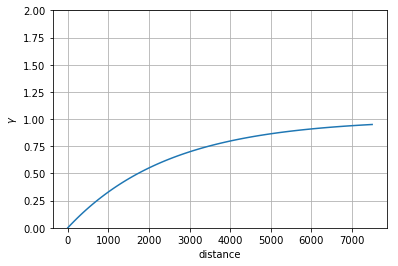

In [21]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=2500.0)
gs = pyemu.geostats.GeoStruct(variograms=v,nugget=0.0)
ax = gs.plot()
ax.grid()
ax.set_ylim(0,2.0)

Now we need to know where the pilot points are.  We can get this from the pilot point template file:

In [22]:
df_pp = pyemu.gw_utils.pp_tpl_to_dataframe(os.path.join(working_dir,"hkpp.dat.tpl"))

Now let's build a covariance matrix from the geostatistical structure

In [23]:
cov = gs.covariance_matrix(df_pp.x,df_pp.y,df_pp.parnme)

In [24]:
pyemu.helpers.first_order_pearson_tikhonov(pst,cov)

In [25]:
pst.prior_information

,equation,obgnme,pilbl,weight
pilbl,,,,
pcc_122,1.0 * log(hk00) - 1.0 * log(hk01) = 0.0,regul_cc,pcc_122,0.670320
pcc_123,1.0 * log(hk00) - 1.0 * log(hk02) = 0.0,regul_cc,pcc_123,0.449329
pcc_124,1.0 * log(hk00) - 1.0 * log(hk03) = 0.0,regul_cc,pcc_124,0.301194
pcc_125,1.0 * log(hk00) - 1.0 * log(hk04) = 0.0,regul_cc,pcc_125,0.201897
pcc_126,1.0 * log(hk00) - 1.0 * log(hk05) = 0.0,regul_cc,pcc_126,0.670320
pcc_127,1.0 * log(hk00) - 1.0 * log(hk06) = 0.0,regul_cc,pcc_127,0.567971
pcc_128,1.0 * log(hk00) - 1.0 * log(hk07) = 0.0,regul_cc,pcc_128,0.408842
pcc_129,1.0 * log(hk00) - 1.0 * log(hk08) = 0.0,regul_cc,pcc_129,0.282264
pcc_130,1.0 * log(hk00) - 1.0 * log(hk09) = 0.0,regul_cc,pcc_130,0.192195


What happened?  We replace the preferred value equations with a bunch of new equations.  These equations each include two parameter names and have different weights - can you guess what the weights are?  The weights are the pearson correlation coefficients (CC) between the pilot points (remember those from way back?).  These CC values are calculated from the covariance matrix, which is implied by the geostatistical structure...whew! For example, ``hk00`` is "close" to ``hk01``, so they have a high CC value (equation 1).  Just for fun, go back and change the "a" parameter in the variogram and see how it changes the CC values...

# Truncated Singular Value Decomposition (TSVD) as a regularization device

<img src="PEST++V3_cover.jpeg" style="float: left">

<img src="flopylogo.png" style="float: right">

<img src="AW&H2015.png" style="float: center">

### Recall that regularization refers to any approach that makes an illposed/underdetermined parameter estimation problem solvable.  Therefore, when you manually reduce the number of parameters such as zones you are doing a type of regularization.  

### Singular Value Decomposition can be thought of as operating in a similar fashion but is automated, and more clever.  Using the Jacobian matrix, it reduces the number of base parameters by making linear combinations of the base parameters.  Thus two perfectly correlated parameters become 1 combined parameter, which helps give a unique solution to the parameter estimation problem. Those linear combinations (__=singular values__) that are in the noise (__=null space__) get truncated (__=removed from the parameter estimation process__).  This means that insensitive parameters don't adversely affect the parameter estimation process.  Those linear combinations that remain (__=solution space__) are then used to solve the parameters estimation problem.  

### Truncated SVD approach makes for a parameter estimation process that is __*unconditionally stable*__, which means it is guaranteed to be well-posed, and solvable. But the number of singular values also controls, in a somewhat brute force way, the degree of parameter smoothing and fit. The key to stability and degree of smoothing is this truncation process, which we'll dig into here.


# First, let's make the Jacobian matrix at the starting conditions

In [ ]:
inpst = pyemu.Pst(os.path.join(working_dir,'freyberg_pp.pst'))
inpst.control_data.noptmax=-1
inpst.write(os.path.join(working_dir,'freyberg_jac.pst'))


In [ ]:
os.chdir('freyberg_pp')
pyemu.helpers.start_slaves('.',"pestpp",'freyberg_jac.pst',num_slaves=15,master_dir='.')
os.chdir('..')

# in `pyemu` we can read in the  Jacobian and, if we form the Schur complement object, we also get $\mathbf{X}^T\mathbf{Q}\mathbf{X}$

In [ ]:
injac = pyemu.Schur(os.path.join(working_dir,'freyberg_jac.jcb'))

## now let's look at the singular value spectrum

In [ ]:
U,S,V = np.linalg.svd(injac.xtqx.df())

In [ ]:
plt.bar(range(len(S)),S)
plt.yscale('log')
plt.grid('on')

# So what if we only use parameters comprising the first 2 singular vectors?

In [ ]:
inpst = pyemu.Pst(os.path.join(working_dir,'freyberg_pp.pst'))

In [ ]:
inpst.pestpp_options['n_iter_super'] = 100
inpst.pestpp_options['max_n_super'] = 2
inpst.pestpp_options

In [ ]:
inpst.write(os.path.join(working_dir,'freyberg_TSVD.pst'))


In [ ]:
os.chdir('freyberg_pp')
pyemu.helpers.start_slaves('.',"pestpp",'freyberg_TSVD.pst',num_slaves=15,master_dir='.')
os.chdir('..')

In [ ]:
indf = pd.read_csv(os.path.join(working_dir,'freyberg_TSVD.iobj'))

In [ ]:
indf

In [ ]:
os.chdir('freyberg_pp')
th.update_K('freyberg_TSVD.pst')
os.chdir('..')

In [ ]:
th.plot_K_results(working_dir, 'freyberg_TSVD')

# How does this compare with the pilot points solution?

In [ ]:
inpst = pyemu.Pst(os.path.join(working_dir,'freyberg_pp.pst'))


In [ ]:
os.chdir('freyberg_pp')
pyemu.helpers.start_slaves('.',"pestpp",'freyberg_pp.pst',num_slaves=15,master_dir='.')
os.chdir('..')

In [ ]:
os.chdir('freyberg_pp')
th.update_K('freyberg_pp.pst')
os.chdir('..')

In [ ]:
th.plot_K_results(working_dir, 'freyberg_pp')